In [2]:
import DriverRisk as dr
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import OneHotEncoder

In [3]:
driver_df = pd.read_csv('data/telematics.csv')
driver_df = driver_df.drop(columns = ['Territory'])
categorical_features = ['Insured.sex','Marital','Car.use','Region']

# Create the encoder object
encoder = OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(driver_df[categorical_features])

# Get feature names after encoding
feature_names = encoder.get_feature_names_out(categorical_features)

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=driver_df.index)

# Drop original categorical columns and concatenate encoded columns
numerical_features = [col for col in driver_df.columns if col not in categorical_features]
driver_df = pd.concat([driver_df[numerical_features], encoded_df], axis=1)

In [4]:
driver_df['Duration'].max()

366

In [4]:
affected_features = ['Accel.06miles', 'Accel.08miles', 'Accel.09miles',
       'Accel.11miles', 'Accel.12miles', 'Accel.14miles', 'Brake.06miles',
       'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles',
       'Brake.14miles', 'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity11', 'Right.turn.intensity12']

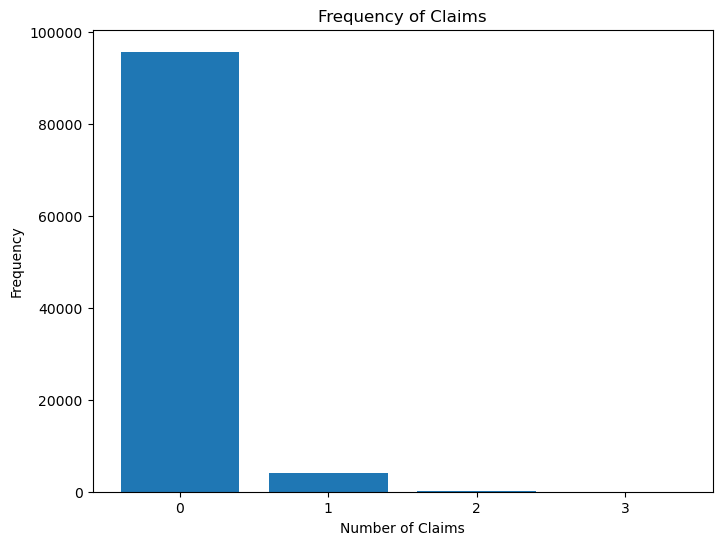

In [6]:
NB_Claims = driver_df["NB_Claim"]
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your array
# NB_Claims = np.array([0, 1, 0, 2, 1, 0, 3, 1, 2, 0, ...])

# Method 1: Using matplotlib
plt.figure(figsize=(8, 6))
values, counts = np.unique(NB_Claims, return_counts=True)
plt.bar(values, counts)
plt.title('Frequency of Claims')
plt.xlabel('Number of Claims')
plt.ylabel('Frequency')
plt.xticks(values)  # This ensures only the actual values are shown
plt.show()

In [11]:
sum(driver_df['NB_Claim'] ==2)

200

In [21]:
driver_df[driver_df["NB_Claim"] == 3]["AMT_Claim"].mean()

4077.493669090909

In [20]:
driver_df[driver_df["NB_Claim"] == 1]["AMT_Claim"].mean()

3046.376575974956

In [5]:
driver_df_1 = driver_df.copy()

# Method 2: Using map with lambda
driver_df_1['NB_Claim'] = driver_df_1['NB_Claim'].map(lambda x: 1 if x > 0 else 0)

driver_df_1_train = driver_df_1
driver_df_1_train = driver_df_1_train.drop(columns=['AMT_Claim'])

In [6]:
driver_df_1_train

,Duration,Insured.age,Car.age,Credit.score,Annual.miles.drive,Years.noclaims,Annual.pct.driven,Total.miles.driven,Pct.drive.mon,Pct.drive.tue,...,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,Insured.sex_Male,Marital_Single,Car.use_Commute,Car.use_Farmer,Car.use_Private,Region_Urban
0,366,45,-1,609.0,6213.71,25,0.849315,8864.376247,0.148070,0.152466,...,0.0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0
1,182,44,3,575.0,12427.42,20,0.465753,8092.308208,0.147686,0.136917,...,219.0,101.0,40.0,1,0.0,0.0,1.0,0.0,0.0,1.0
2,184,48,6,847.0,12427.42,14,0.520548,3225.832512,0.153735,0.097124,...,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0
3,183,71,6,842.0,6213.71,43,0.065753,253.024528,0.106702,0.056437,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,1.0,1.0
4,183,84,10,856.0,6213.71,65,0.441096,4374.379634,0.123807,0.169661,...,18.0,4.0,2.0,0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,182,61,10,824.0,6213.71,42,0.161644,903.231641,0.068358,0.110253,...,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,1.0,1.0
99996,192,48,3,850.0,12427.42,32,0.167123,2870.045192,0.160821,0.124073,...,48.0,22.0,11.0,0,1.0,0.0,1.0,0.0,0.0,1.0
99997,184,50,2,650.0,6213.71,31,0.117808,935.538222,0.095132,0.076684,...,0.0,0.0,0.0,0,1.0,1.0,1.0,0.0,0.0,0.0
99998,184,76,2,811.0,6213.71,58,0.473973,4287.600459,0.106783,0.151199,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0


In [4]:
driver_df_amt = driver_df[driver_df["NB_Claim"] >= 1]
driver_df_amt['AMT_Claim'] = driver_df_amt['AMT_Claim'] / driver_df_amt['NB_Claim']

/var/folders/8m/x5x5_dcs5tx95d8b0v2mhb1r0000gn/T/ipykernel_45710/670737245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_df_amt['AMT_Claim'] = driver_df_amt['AMT_Claim'] / driver_df_amt['NB_Claim']


In [10]:
sum(driver_df_amt["AMT_Claim"] == 0)

408

Class distribution:
Class 0: 95728 samples (95.73%)
Class 1: 4272 samples (4.27%)
Training AMT


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/qinyanghe/opt/anaconda3/envs/MLenvironment/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name           | Type           | Params | Mode 
----------------------------------------------------------
0 | train_accuracy | BinaryAccuracy | 0      | train
1 | val_accuracy   | BinaryAccuracy | 0      | train
2 | network        | Sequential     | 47.2 K | train
------------------------------------------------------


Epoch 0:
val_loss: 1.4579
val_acc: 0.0427

Epoch 1:
val_loss: 1.4579
val_acc: 0.0427
train_loss: 3.0227
train_acc: 0.4982

Epoch 2:
val_loss: 1.4579
val_acc: 0.0427
train_loss: 2.9975
train_acc: 0.4976

Epoch 3:
val_loss: 1.4579
val_acc: 0.0427
train_loss: 3.0035
train_acc: 0.4993


Metric val_loss improved by 0.157 >= min_delta = 0.0001. New best score: 1.301



Epoch 4:
val_loss: 1.3005
val_acc: 0.0469
train_loss: 3.0028
train_acc: 0.4994


Metric val_loss improved by 0.047 >= min_delta = 0.0001. New best score: 1.254



Epoch 5:
val_loss: 1.2538
val_acc: 0.0766
train_loss: 2.9701
train_acc: 0.5019

Epoch 6:
val_loss: 1.2813
val_acc: 0.0671
train_loss: 2.9286
train_acc: 0.5086


Metric val_loss improved by 0.009 >= min_delta = 0.0001. New best score: 1.244



Epoch 7:
val_loss: 1.2444
val_acc: 0.0993
train_loss: 2.9295
train_acc: 0.5190


Metric val_loss improved by 0.005 >= min_delta = 0.0001. New best score: 1.239



Epoch 8:
val_loss: 1.2394
val_acc: 0.1104
train_loss: 2.9009
train_acc: 0.5227

Epoch 9:
val_loss: 1.2416
val_acc: 0.1153
train_loss: 2.9170
train_acc: 0.5341

Epoch 10:
val_loss: 1.2409
val_acc: 0.1336
train_loss: 2.8958
train_acc: 0.5370


Metric val_loss improved by 0.016 >= min_delta = 0.0001. New best score: 1.223



Epoch 11:
val_loss: 1.2235
val_acc: 0.1484
train_loss: 2.9026
train_acc: 0.5507


Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 1.222



Epoch 12:
val_loss: 1.2224
val_acc: 0.1688
train_loss: 2.8984
train_acc: 0.5544


Metric val_loss improved by 0.008 >= min_delta = 0.0001. New best score: 1.214



Epoch 13:
val_loss: 1.2139
val_acc: 0.1831
train_loss: 2.8922
train_acc: 0.5637

Epoch 14:
val_loss: 1.2192
val_acc: 0.1668
train_loss: 2.8926
train_acc: 0.5699


Metric val_loss improved by 0.008 >= min_delta = 0.0001. New best score: 1.206



Epoch 15:
val_loss: 1.2055
val_acc: 0.2006
train_loss: 2.8832
train_acc: 0.5731


Metric val_loss improved by 0.013 >= min_delta = 0.0001. New best score: 1.192



Epoch 16:
val_loss: 1.1922
val_acc: 0.2459
train_loss: 2.8765
train_acc: 0.5736

Epoch 17:
val_loss: 1.1979
val_acc: 0.2004
train_loss: 2.8846
train_acc: 0.5801

Epoch 18:
val_loss: 1.2026
val_acc: 0.2076
train_loss: 2.8828
train_acc: 0.5846


Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 1.188



Epoch 19:
val_loss: 1.1879
val_acc: 0.2167
train_loss: 2.8795
train_acc: 0.5816


Metric val_loss improved by 0.009 >= min_delta = 0.0001. New best score: 1.179



Epoch 20:
val_loss: 1.1791
val_acc: 0.2400
train_loss: 2.8709
train_acc: 0.5879


Metric val_loss improved by 0.007 >= min_delta = 0.0001. New best score: 1.172



Epoch 21:
val_loss: 1.1723
val_acc: 0.2441
train_loss: 2.8735
train_acc: 0.5905

Epoch 22:
val_loss: 1.1903
val_acc: 0.1886
train_loss: 2.8676
train_acc: 0.5868


Metric val_loss improved by 0.010 >= min_delta = 0.0001. New best score: 1.162



Epoch 23:
val_loss: 1.1619
val_acc: 0.2886
train_loss: 2.8599
train_acc: 0.5962

Epoch 24:
val_loss: 1.1743
val_acc: 0.2143
train_loss: 2.8668
train_acc: 0.5903

Epoch 25:
val_loss: 1.1637
val_acc: 0.2229
train_loss: 2.8754
train_acc: 0.5875


Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 1.161



Epoch 26:
val_loss: 1.1607
val_acc: 0.1791
train_loss: 2.8603
train_acc: 0.5914


Metric val_loss improved by 0.008 >= min_delta = 0.0001. New best score: 1.152



Epoch 27:
val_loss: 1.1524
val_acc: 0.2364
train_loss: 2.8528
train_acc: 0.5824

Epoch 28:
val_loss: 1.1570
val_acc: 0.1929
train_loss: 2.8558
train_acc: 0.5789


Metric val_loss improved by 0.005 >= min_delta = 0.0001. New best score: 1.147



Epoch 29:
val_loss: 1.1471
val_acc: 0.3123
train_loss: 2.8468
train_acc: 0.5883

Epoch 30:
val_loss: 1.1481
val_acc: 0.2173
train_loss: 2.8541
train_acc: 0.5861


Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 1.144



Epoch 31:
val_loss: 1.1439
val_acc: 0.3016
train_loss: 2.8511
train_acc: 0.5950


Metric val_loss improved by 0.007 >= min_delta = 0.0001. New best score: 1.137



Epoch 32:
val_loss: 1.1373
val_acc: 0.3347
train_loss: 2.8549
train_acc: 0.5920

Epoch 33:
val_loss: 1.1452
val_acc: 0.2171
train_loss: 2.8402
train_acc: 0.6066

Epoch 34:
val_loss: 1.1430
val_acc: 0.1745
train_loss: 2.8441
train_acc: 0.5955

Epoch 35:
val_loss: 1.1383
val_acc: 0.2266
train_loss: 2.8325
train_acc: 0.5765


Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 1.134



Epoch 36:
val_loss: 1.1336
val_acc: 0.1660
train_loss: 2.8520
train_acc: 0.5853

Epoch 37:
val_loss: 1.1403
val_acc: 0.1914
train_loss: 2.8366
train_acc: 0.5753


Metric val_loss improved by 0.009 >= min_delta = 0.0001. New best score: 1.125



Epoch 38:
val_loss: 1.1250
val_acc: 0.2331
train_loss: 2.8420
train_acc: 0.5605

Epoch 39:
val_loss: 1.1327
val_acc: 0.1909
train_loss: 2.8440
train_acc: 0.5760

Epoch 40:
val_loss: 1.1287
val_acc: 0.1697
train_loss: 2.8308
train_acc: 0.5835


Metric val_loss improved by 0.005 >= min_delta = 0.0001. New best score: 1.120



Epoch 41:
val_loss: 1.1198
val_acc: 0.2637
train_loss: 2.8444
train_acc: 0.5889

Epoch 42:
val_loss: 1.1201
val_acc: 0.2617
train_loss: 2.8322
train_acc: 0.6019

Epoch 43:
val_loss: 1.1350
val_acc: 0.1880
train_loss: 2.8386
train_acc: 0.6063

Epoch 44:
val_loss: 1.1207
val_acc: 0.2573
train_loss: 2.8327
train_acc: 0.5930


Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 1.116



Epoch 45:
val_loss: 1.1159
val_acc: 0.2264
train_loss: 2.8423
train_acc: 0.6062


Metric val_loss improved by 0.009 >= min_delta = 0.0001. New best score: 1.107



Epoch 46:
val_loss: 1.1071
val_acc: 0.2406
train_loss: 2.8287
train_acc: 0.5987

Epoch 47:
val_loss: 1.1211
val_acc: 0.2008
train_loss: 2.8178
train_acc: 0.5939

Epoch 48:
val_loss: 1.1112
val_acc: 0.2497
train_loss: 2.8364
train_acc: 0.5962


Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 1.104



Epoch 49:
val_loss: 1.1037
val_acc: 0.2949
train_loss: 2.8331
train_acc: 0.6014

Epoch 50:
val_loss: 1.1045
val_acc: 0.2489
train_loss: 2.8232
train_acc: 0.6168

Epoch 51:
val_loss: 1.1180
val_acc: 0.1731
train_loss: 2.8225
train_acc: 0.6045


Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 1.103



Epoch 52:
val_loss: 1.1030
val_acc: 0.2708
train_loss: 2.8180
train_acc: 0.5898

Epoch 53:
val_loss: 1.1035
val_acc: 0.2629
train_loss: 2.8203
train_acc: 0.6079

Epoch 54:
val_loss: 1.1081
val_acc: 0.2099
train_loss: 2.8259
train_acc: 0.6162


Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 1.101



Epoch 55:
val_loss: 1.1005
val_acc: 0.2836
train_loss: 2.8242
train_acc: 0.6114


Metric val_loss improved by 0.009 >= min_delta = 0.0001. New best score: 1.092



Epoch 56:
val_loss: 1.0917
val_acc: 0.3297
train_loss: 2.8253
train_acc: 0.6179

Epoch 57:
val_loss: 1.1006
val_acc: 0.2452
train_loss: 2.8139
train_acc: 0.6369

Epoch 58:
val_loss: 1.0944
val_acc: 0.3121
train_loss: 2.8283
train_acc: 0.6154

Epoch 59:
val_loss: 1.0945
val_acc: 0.2951
train_loss: 2.8268
train_acc: 0.6211

Epoch 60:
val_loss: 1.0950
val_acc: 0.2787
train_loss: 2.8140
train_acc: 0.6316

Epoch 61:
val_loss: 1.0954
val_acc: 0.2867
train_loss: 2.8209
train_acc: 0.6305

Epoch 62:
val_loss: 1.0978
val_acc: 0.2951
train_loss: 2.8127
train_acc: 0.6200

Epoch 63:
val_loss: 1.1014
val_acc: 0.2499
train_loss: 2.8196
train_acc: 0.6214

Epoch 64:
val_loss: 1.0937
val_acc: 0.3008
train_loss: 2.8132
train_acc: 0.6177


Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 1.088



Epoch 65:
val_loss: 1.0877
val_acc: 0.2538
train_loss: 2.8119
train_acc: 0.6154

Epoch 66:
val_loss: 1.0887
val_acc: 0.2571
train_loss: 2.8284
train_acc: 0.6162


Metric val_loss improved by 0.006 >= min_delta = 0.0001. New best score: 1.082



Epoch 67:
val_loss: 1.0821
val_acc: 0.2836
train_loss: 2.8173
train_acc: 0.6010

Epoch 68:
val_loss: 1.0894
val_acc: 0.2654
train_loss: 2.8198
train_acc: 0.6201

Epoch 69:
val_loss: 1.0858
val_acc: 0.3169
train_loss: 2.8163
train_acc: 0.6290

Epoch 70:
val_loss: 1.0891
val_acc: 0.2669
train_loss: 2.8241
train_acc: 0.6221

Epoch 71:
val_loss: 1.0849
val_acc: 0.3160
train_loss: 2.8213
train_acc: 0.6201

Epoch 72:
val_loss: 1.0845
val_acc: 0.2717
train_loss: 2.8164
train_acc: 0.6259


Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 1.081



Epoch 73:
val_loss: 1.0806
val_acc: 0.3466
train_loss: 2.8136
train_acc: 0.6255


Metric val_loss improved by 0.005 >= min_delta = 0.0001. New best score: 1.075



Epoch 74:
val_loss: 1.0754
val_acc: 0.3464
train_loss: 2.8046
train_acc: 0.6337

Epoch 75:
val_loss: 1.0826
val_acc: 0.3031
train_loss: 2.8110
train_acc: 0.6294

Epoch 76:
val_loss: 1.0835
val_acc: 0.3454
train_loss: 2.8025
train_acc: 0.6371

Epoch 77:
val_loss: 1.0858
val_acc: 0.3110
train_loss: 2.8082
train_acc: 0.6433


Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 1.075



Epoch 78:
val_loss: 1.0752
val_acc: 0.3406
train_loss: 2.8151
train_acc: 0.6485

Epoch 79:
val_loss: 1.0782
val_acc: 0.3114
train_loss: 2.8047
train_acc: 0.6419

Epoch 80:
val_loss: 1.0842
val_acc: 0.2759
train_loss: 2.8149
train_acc: 0.6370

Epoch 81:
val_loss: 1.0843
val_acc: 0.2946
train_loss: 2.8097
train_acc: 0.6232

Epoch 82:
val_loss: 1.0850
val_acc: 0.2728
train_loss: 2.8181
train_acc: 0.6252

Epoch 83:
val_loss: 1.0753
val_acc: 0.3285
train_loss: 2.8184
train_acc: 0.6172

Epoch 84:
val_loss: 1.0753
val_acc: 0.2953
train_loss: 2.8181
train_acc: 0.6322

Epoch 85:
val_loss: 1.0805
val_acc: 0.3099
train_loss: 2.8033
train_acc: 0.6318

Epoch 86:
val_loss: 1.0854
val_acc: 0.2414
train_loss: 2.8124
train_acc: 0.6357

Epoch 87:
val_loss: 1.0778
val_acc: 0.3296
train_loss: 2.8069
train_acc: 0.6296


Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 1.075



Epoch 88:
val_loss: 1.0749
val_acc: 0.2668
train_loss: 2.8101
train_acc: 0.6230

Epoch 89:
val_loss: 1.0778
val_acc: 0.2572
train_loss: 2.8025
train_acc: 0.6352

Epoch 90:
val_loss: 1.0783
val_acc: 0.2803
train_loss: 2.8177
train_acc: 0.6227


Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 1.073



Epoch 91:
val_loss: 1.0731
val_acc: 0.2842
train_loss: 2.8202
train_acc: 0.6200

Epoch 92:
val_loss: 1.0832
val_acc: 0.2450
train_loss: 2.8113
train_acc: 0.6288

Epoch 93:
val_loss: 1.0737
val_acc: 0.3017
train_loss: 2.8131
train_acc: 0.6217

Epoch 94:
val_loss: 1.0743
val_acc: 0.2730
train_loss: 2.8046
train_acc: 0.6234


Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 1.072



Epoch 95:
val_loss: 1.0723
val_acc: 0.2501
train_loss: 2.8130
train_acc: 0.6215

Epoch 96:
val_loss: 1.0742
val_acc: 0.2890
train_loss: 2.7974
train_acc: 0.6230

Epoch 97:
val_loss: 1.0793
val_acc: 0.2839
train_loss: 2.8129
train_acc: 0.6289


Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 1.071



Epoch 98:
val_loss: 1.0712
val_acc: 0.2729
train_loss: 2.8063
train_acc: 0.6333


`Trainer.fit` stopped: `max_epochs=100` reached.



Epoch 99:
val_loss: 1.0748
val_acc: 0.2248
train_loss: 2.7953
train_acc: 0.5940

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.69      0.82      9573
           1       0.11      0.89      0.20       427

    accuracy                           0.70     10000
   macro avg       0.55      0.79      0.51     10000
weighted avg       0.96      0.70      0.79     10000



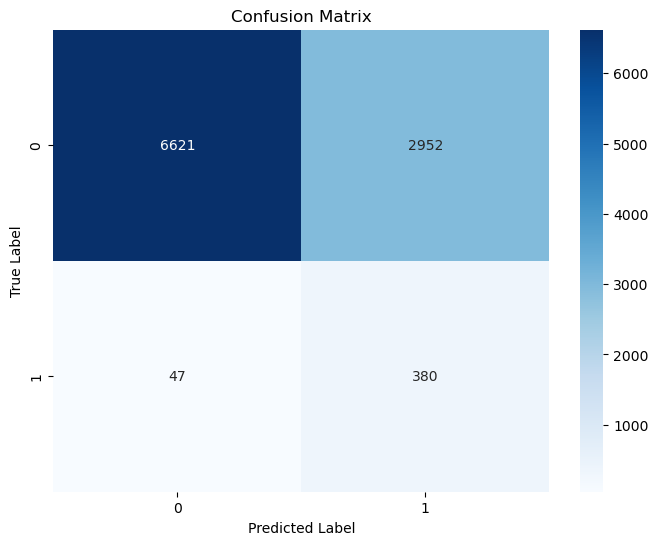

In [4]:
networks_data = {}
data_module, input_size, scaler = dr.prepare_data_module(driver_df_1_train, 'NB_Claim', 85)
networks_data["AMT"] = {
    'model': dr.create_subsim1(input_size),
    'data_module': data_module
}
#trainer = pl.Trainer(max_epochs=100)
for name, data in networks_data.items():
    print(f"Training {name}")
    model = dr.train_model_with_early_stopping(
    model=data['model'],
    data_module=data['data_module'],
    max_epochs=100,
    early_stopping_patience=10,
    monitor='val_loss',
    mode='min'
    )
    dr.evaluate_model(model, data_module, split='test')

In [6]:
with open('models/scaler_1.pkl', 'wb') as f:
    pickle.dump(scaler, f)

Class distribution:
Class 1: 4272 samples (100.00%)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.27      0.43      3075

    accuracy                           0.27      3075
   macro avg       0.50      0.14      0.22      3075
weighted avg       1.00      0.27      0.43      3075



/Users/qinyanghe/opt/anaconda3/envs/MLenvironment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/qinyanghe/opt/anaconda3/envs/MLenvironment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/qinyanghe/opt/anaconda3/envs/MLenvironment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

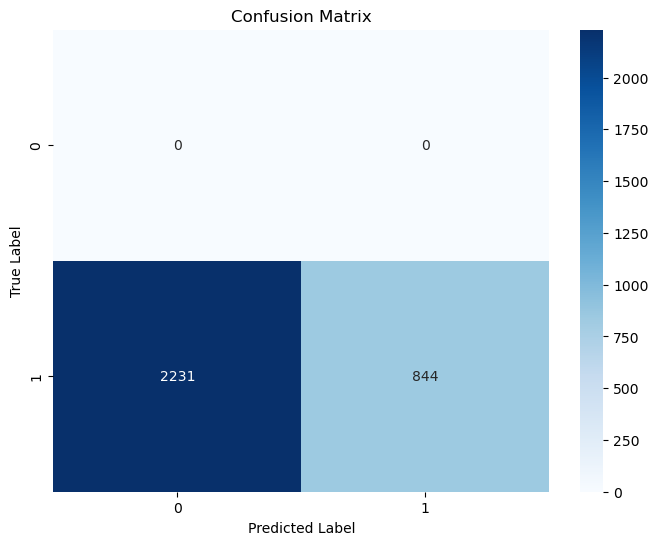

In [12]:
driver_df_1 = driver_df.copy()

driver_df_1['NB_Claim'] = driver_df_1['NB_Claim'].map(lambda x: 1 if x > 0 else 0)

driver_df_1_train = driver_df_1
driver_df_1_train = driver_df_1_train.drop(columns=['AMT_Claim'])
driver_df_1_train = driver_df_1_train[driver_df_1_train["NB_Claim"]>=1]
data_module, input_size = dr.prepare_data_module(driver_df_1_train, 'NB_Claim', 85, oversample_minority=False)
data_module.setup()
dr.evaluate_model(simu_model_1, data_module, split='train')

In [41]:
driver_df_1_train

,Duration,Insured.age,Car.age,Credit.score,Annual.miles.drive,Years.noclaims,Annual.pct.driven,Total.miles.driven,Pct.drive.mon,Pct.drive.tue,...,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,Insured.sex_Male,Marital_Single,Car.use_Commute,Car.use_Farmer,Car.use_Private,Region_Urban
0,366,45,-1,609.0,6213.71,25,0.849315,8864.376247,0.148070,0.152466,...,0.0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0
1,182,44,3,575.0,12427.42,20,0.465753,8092.308208,0.147686,0.136917,...,219.0,101.0,40.0,1,0.0,0.0,1.0,0.0,0.0,1.0
2,184,48,6,847.0,12427.42,14,0.520548,3225.832512,0.153735,0.097124,...,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0
3,183,71,6,842.0,6213.71,43,0.065753,253.024528,0.106702,0.056437,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,1.0,1.0
4,183,84,10,856.0,6213.71,65,0.441096,4374.379634,0.123807,0.169661,...,18.0,4.0,2.0,0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,182,61,10,824.0,6213.71,42,0.161644,903.231641,0.068358,0.110253,...,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,1.0,1.0
99996,192,48,3,850.0,12427.42,32,0.167123,2870.045192,0.160821,0.124073,...,48.0,22.0,11.0,0,1.0,0.0,1.0,0.0,0.0,1.0
99997,184,50,2,650.0,6213.71,31,0.117808,935.538222,0.095132,0.076684,...,0.0,0.0,0.0,0,1.0,1.0,1.0,0.0,0.0,0.0
99998,184,76,2,811.0,6213.71,58,0.473973,4287.600459,0.106783,0.151199,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0


In [7]:
driver_df_2 = driver_df.copy()
driver_df_2 = driver_df_2[driver_df_2['NB_Claim'] >= 1]
driver_df_2['NB_Claim'] = driver_df_2['NB_Claim'].map(lambda x: 1 if x > 1 else 0)

driver_df_2_train = driver_df_2
driver_df_2_train = driver_df_2_train.drop(columns=['AMT_Claim'])

In [28]:
driver_df_2_train

,Duration,Insured.age,Car.age,Credit.score,Annual.miles.drive,Years.noclaims,Annual.pct.driven,Total.miles.driven,Pct.drive.mon,Pct.drive.tue,...,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,Insured.sex_Male,Marital_Single,Car.use_Commute,Car.use_Farmer,Car.use_Private,Region_Urban
0,366,45,-1,609.0,6213.710,25,0.849315,8864.376247,0.148070,0.152466,...,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0,0.0,1.0
1,182,44,3,575.0,12427.420,20,0.465753,8092.308208,0.147686,0.136917,...,219.0,101.0,40.0,0,0.0,0.0,1.0,0.0,0.0,1.0
14,366,77,8,814.0,6213.710,19,0.747945,7309.344429,0.119339,0.194950,...,222.0,103.0,40.0,0,1.0,0.0,0.0,0.0,1.0,1.0
27,365,51,6,824.0,12427.420,34,1.000000,16902.354863,0.138921,0.146376,...,29.0,7.0,2.0,0,1.0,0.0,1.0,0.0,0.0,1.0
42,365,66,5,842.0,12427.420,45,0.673973,8095.338964,0.105028,0.155433,...,8.0,2.0,1.0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99833,366,45,6,721.0,15534.275,11,0.920548,17542.396620,0.115797,0.124605,...,348.0,163.0,70.0,0,1.0,0.0,1.0,0.0,0.0,1.0
99842,366,47,4,682.0,12427.420,8,0.545205,5983.406580,0.140313,0.182449,...,1.0,0.0,0.0,0,0.0,1.0,1.0,0.0,0.0,1.0
99915,328,29,5,593.0,6213.710,10,0.624658,7802.424028,0.128063,0.161626,...,221.0,116.0,47.0,0,0.0,1.0,0.0,0.0,1.0,1.0
99919,366,51,0,623.0,6213.710,12,0.953425,13058.216403,0.154316,0.143480,...,34.0,18.0,9.0,0,1.0,0.0,1.0,0.0,0.0,1.0


In [118]:
sum(driver_df[driver_df['NB_Claim'] >= 1]['NB_Claim'] == 2)

200

In [32]:
import importlib
importlib.reload(dr)

<module 'DriverRisk' from '/Users/qinyanghe/Library/Mobile Documents/com~apple~CloudDocs/Documents/driver behavior modeling/DriverRisk.py'>

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name           | Type           | Params | Mode 
----------------------------------------------------------
0 | train_accuracy | BinaryAccuracy | 0      | train
1 | val_accuracy   | BinaryAccuracy | 0      | train
2 | network        | Sequential     | 61.0 K | train
----------------------------------------------------------
61.0 K    Trainable params
0         Non-trainable params
61.0 K    Total params
0.244     Total estimated model params size (MB)
14        Modules in train mode
0         Modules in eval mode


Class distribution:
Class 0: 4061 samples (95.06%)
Class 1: 211 samples (4.94%)
Training AMT


/Users/qinyanghe/opt/anaconda3/envs/MLenvironment/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:420: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.
/Users/qinyanghe/opt/anaconda3/envs/MLenvironment/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:420: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
Metric val_loss improved. New best score: 1.479



Epoch 0:
val_loss: 1.4794
val_acc: 0.0494

Epoch 1:
val_loss: 1.4794
val_acc: 0.0494
train_loss: 3.0649
train_acc: 0.4963

Epoch 2:
val_loss: 1.4795
val_acc: 0.0494
train_loss: 2.9542
train_acc: 0.4849

Epoch 3:
val_loss: 1.4795
val_acc: 0.0494
train_loss: 3.0448
train_acc: 0.5115

Epoch 4:
val_loss: 1.4794
val_acc: 0.0494
train_loss: 3.0248
train_acc: 0.5057


Metric val_loss improved by 0.098 >= min_delta = 0.0001. New best score: 1.381



Epoch 5:
val_loss: 1.3811
val_acc: 0.0533
train_loss: 3.0353
train_acc: 0.5086

Epoch 6:
val_loss: 1.3833
val_acc: 0.0572
train_loss: 2.9691
train_acc: 0.4950


Metric val_loss improved by 0.024 >= min_delta = 0.0001. New best score: 1.357



Epoch 7:
val_loss: 1.3569
val_acc: 0.0689
train_loss: 3.0442
train_acc: 0.5275


Metric val_loss improved by 0.039 >= min_delta = 0.0001. New best score: 1.318



Epoch 8:
val_loss: 1.3183
val_acc: 0.1040
train_loss: 2.9086
train_acc: 0.4972

Epoch 9:
val_loss: 1.3370
val_acc: 0.0780
train_loss: 2.9440
train_acc: 0.5294

Epoch 10:
val_loss: 1.3323
val_acc: 0.1014
train_loss: 2.9458
train_acc: 0.5177


Metric val_loss improved by 0.009 >= min_delta = 0.0001. New best score: 1.309



Epoch 11:
val_loss: 1.3095
val_acc: 0.1222
train_loss: 2.9105
train_acc: 0.5226


Metric val_loss improved by 0.037 >= min_delta = 0.0001. New best score: 1.273



Epoch 12:
val_loss: 1.2729
val_acc: 0.1443
train_loss: 2.8854
train_acc: 0.5259

Epoch 13:
val_loss: 1.2903
val_acc: 0.1118
train_loss: 2.9397
train_acc: 0.5633

Epoch 14:
val_loss: 1.2986
val_acc: 0.1443
train_loss: 2.9040
train_acc: 0.5623


Metric val_loss improved by 0.014 >= min_delta = 0.0001. New best score: 1.259



Epoch 15:
val_loss: 1.2588
val_acc: 0.2042
train_loss: 2.8620
train_acc: 0.5317

Epoch 16:
val_loss: 1.2617
val_acc: 0.1964
train_loss: 2.8220
train_acc: 0.5600


Metric val_loss improved by 0.024 >= min_delta = 0.0001. New best score: 1.235



Epoch 17:
val_loss: 1.2348
val_acc: 0.2120
train_loss: 2.8564
train_acc: 0.5837


Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 1.233



Epoch 18:
val_loss: 1.2333
val_acc: 0.2367
train_loss: 2.8811
train_acc: 0.5964

Epoch 19:
val_loss: 1.2598
val_acc: 0.1704
train_loss: 2.9052
train_acc: 0.5977

Epoch 20:
val_loss: 1.2416
val_acc: 0.1834
train_loss: 2.8565
train_acc: 0.5561

Epoch 21:
val_loss: 1.2688
val_acc: 0.1417
train_loss: 2.8847
train_acc: 0.5828

Epoch 22:
val_loss: 1.2670
val_acc: 0.1743
train_loss: 2.9434
train_acc: 0.5727

Epoch 23:
val_loss: 1.2488
val_acc: 0.2354
train_loss: 2.8853
train_acc: 0.5662

Epoch 24:
val_loss: 1.2576
val_acc: 0.2276
train_loss: 2.9103
train_acc: 0.5980

Epoch 25:
val_loss: 1.2375
val_acc: 0.2640
train_loss: 2.8651
train_acc: 0.5860

Epoch 26:
val_loss: 1.2371
val_acc: 0.2432
train_loss: 2.8474
train_acc: 0.6218


Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 1.232



Epoch 27:
val_loss: 1.2318
val_acc: 0.3017
train_loss: 2.8257
train_acc: 0.5951

Epoch 28:
val_loss: 1.2668
val_acc: 0.2484
train_loss: 2.9233
train_acc: 0.6367


Metric val_loss improved by 0.007 >= min_delta = 0.0001. New best score: 1.225



Epoch 29:
val_loss: 1.2251
val_acc: 0.2653
train_loss: 2.8921
train_acc: 0.6436

Epoch 30:
val_loss: 1.2252
val_acc: 0.2926
train_loss: 2.8312
train_acc: 0.6296

Epoch 31:
val_loss: 1.2658
val_acc: 0.2237
train_loss: 2.8740
train_acc: 0.6504

Epoch 32:
val_loss: 1.2370
val_acc: 0.2991
train_loss: 2.8619
train_acc: 0.6527


Metric val_loss improved by 0.015 >= min_delta = 0.0001. New best score: 1.210



Epoch 33:
val_loss: 1.2099
val_acc: 0.3550
train_loss: 2.8825
train_acc: 0.5984

Epoch 34:
val_loss: 1.2160
val_acc: 0.3251
train_loss: 2.8963
train_acc: 0.6582

Epoch 35:
val_loss: 1.2245
val_acc: 0.3212
train_loss: 2.8868
train_acc: 0.6745


Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 1.207



Epoch 36:
val_loss: 1.2074
val_acc: 0.3628
train_loss: 2.8243
train_acc: 0.6361

Epoch 37:
val_loss: 1.2212
val_acc: 0.3108
train_loss: 2.8422
train_acc: 0.6751


Metric val_loss improved by 0.005 >= min_delta = 0.0001. New best score: 1.202



Epoch 38:
val_loss: 1.2024
val_acc: 0.3316
train_loss: 2.8577
train_acc: 0.6699

Epoch 39:
val_loss: 1.2298
val_acc: 0.2861
train_loss: 2.9128
train_acc: 0.6647

Epoch 40:
val_loss: 1.2180
val_acc: 0.2952
train_loss: 2.8446
train_acc: 0.6397


Metric val_loss improved by 0.008 >= min_delta = 0.0001. New best score: 1.195



Epoch 41:
val_loss: 1.1948
val_acc: 0.3615
train_loss: 2.8579
train_acc: 0.6439

Epoch 42:
val_loss: 1.2158
val_acc: 0.2952
train_loss: 2.8767
train_acc: 0.6689


Metric val_loss improved by 0.005 >= min_delta = 0.0001. New best score: 1.189



Epoch 43:
val_loss: 1.1893
val_acc: 0.3953
train_loss: 2.8596
train_acc: 0.6390

Epoch 44:
val_loss: 1.2360
val_acc: 0.2861
train_loss: 2.8174
train_acc: 0.6459

Epoch 45:
val_loss: 1.2048
val_acc: 0.3680
train_loss: 2.8265
train_acc: 0.6842

Epoch 46:
val_loss: 1.2053
val_acc: 0.4109
train_loss: 2.8644
train_acc: 0.6693

Epoch 47:
val_loss: 1.1909
val_acc: 0.4629
train_loss: 2.8100
train_acc: 0.6992


Metric val_loss improved by 0.010 >= min_delta = 0.0001. New best score: 1.180



Epoch 48:
val_loss: 1.1797
val_acc: 0.4434
train_loss: 2.7905
train_acc: 0.7236


Metric val_loss improved by 0.013 >= min_delta = 0.0001. New best score: 1.167



Epoch 49:
val_loss: 1.1672
val_acc: 0.4486
train_loss: 2.8595
train_acc: 0.7294

Epoch 50:
val_loss: 1.2020
val_acc: 0.3953
train_loss: 2.8355
train_acc: 0.7272

Epoch 51:
val_loss: 1.2180
val_acc: 0.3186
train_loss: 2.8275
train_acc: 0.6875

Epoch 52:
val_loss: 1.2163
val_acc: 0.3368
train_loss: 2.8560
train_acc: 0.6728

Epoch 53:
val_loss: 1.1880
val_acc: 0.4070
train_loss: 2.8160
train_acc: 0.6706

Epoch 54:
val_loss: 1.1926
val_acc: 0.3927
train_loss: 2.8309
train_acc: 0.6878

Epoch 55:
val_loss: 1.2032
val_acc: 0.3628
train_loss: 2.8245
train_acc: 0.6784

Epoch 56:
val_loss: 1.1952
val_acc: 0.3732
train_loss: 2.8462
train_acc: 0.6820

Epoch 57:
val_loss: 1.2106
val_acc: 0.3407
train_loss: 2.8598
train_acc: 0.6624

Epoch 58:
val_loss: 1.2086
val_acc: 0.3459
train_loss: 2.8575
train_acc: 0.7015


Monitored metric val_loss did not improve in the last 10 records. Best score: 1.167. Signaling Trainer to stop.



Epoch 59:
val_loss: 1.1939
val_acc: 0.3914
train_loss: 2.8376
train_acc: 0.6380

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.54      0.70       407
           1       0.08      0.81      0.15        21

    accuracy                           0.55       428
   macro avg       0.53      0.67      0.42       428
weighted avg       0.94      0.55      0.67       428



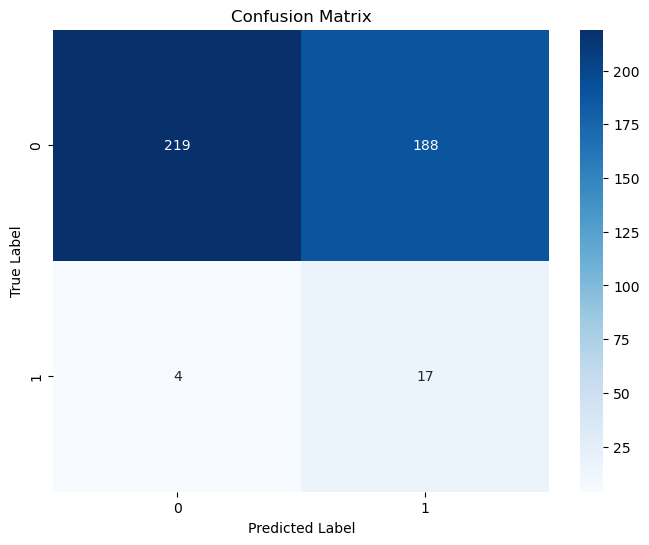

In [8]:
networks_data = {}
data_module, input_size, scaler = dr.prepare_data_module(driver_df_2_train, 'NB_Claim', 18)
networks_data["AMT"] = {
    'model': dr.create_subsim2(input_size, ),
    'data_module': data_module
}
#trainer = pl.Trainer(max_epochs=100)
for name, data in networks_data.items():
    print(f"Training {name}")
    model = dr.train_model_with_early_stopping(
    model=data['model'],
    data_module=data['data_module'],
    max_epochs=100,
    early_stopping_patience=10,
    monitor='val_loss',
    mode='min'
    )
    dr.evaluate_model(model, data_module, split='test')

In [4]:
simu_model_1 = dr.load_model_from_checkpoint("models/nn_1.ckpt",'subsim1')
simu_model_2 = dr.load_model_from_checkpoint("models/nn_2.ckpt",'subsim2')
simu_model_3 = dr.load_model_from_checkpoint("models/nn_3.ckpt",'subsim3')

Successfully loaded model from models/nn_1.ckpt
Successfully loaded model from models/nn_2.ckpt
Successfully loaded model from models/nn_3.ckpt


In [143]:
driver_df_3 = driver_df.copy()
driver_df_3 = driver_df_3[driver_df_3['NB_Claim'] >= 2]
driver_df_3['NB_Claim'] = driver_df_3['NB_Claim'].map(lambda x: 1 if x > 2 else 0)

driver_df_3_train = driver_df_3
driver_df_3_train = driver_df_3_train.drop(columns=['AMT_Claim'])

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name           | Type           | Params | Mode 
----------------------------------------------------------
0 | train_accuracy | BinaryAccuracy | 0      | train
1 | val_accuracy   | BinaryAccuracy | 0      | train
2 | network        | Sequential     | 6.8 K  | train
----------------------------------------------------------
6.8 K     Trainable params
0         Non-trainable params
6.8 K     Total params
0.027     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Class distribution:
Class 0: 200 samples (94.79%)
Class 1: 11 samples (5.21%)
Training subsim3


/Users/qinyanghe/opt/anaconda3/envs/MLenvironment/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:420: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.
/Users/qinyanghe/opt/anaconda3/envs/MLenvironment/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:420: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
Metric val_loss improved. New best score: 1.139



Epoch 0:
val_loss: 1.1387
val_acc: 0.0526

Epoch 1:
val_loss: 1.3510
val_acc: 0.0789
train_loss: 3.4912
train_acc: 0.4768

Epoch 2:
val_loss: 1.5726
val_acc: 0.1053
train_loss: 1.6562
train_acc: 0.5166

Epoch 3:
val_loss: 1.3276
val_acc: 0.3158
train_loss: 0.9921
train_acc: 0.5298


Metric val_loss improved by 0.220 >= min_delta = 0.0001. New best score: 0.919



Epoch 4:
val_loss: 0.9186
val_acc: 0.5526
train_loss: 0.7037
train_acc: 0.6159


Metric val_loss improved by 0.205 >= min_delta = 0.0001. New best score: 0.713



Epoch 5:
val_loss: 0.7132
val_acc: 0.6053
train_loss: 0.5542
train_acc: 0.7351


Metric val_loss improved by 0.165 >= min_delta = 0.0001. New best score: 0.548



Epoch 6:
val_loss: 0.5478
val_acc: 0.7895
train_loss: 0.3493
train_acc: 0.8742


Metric val_loss improved by 0.237 >= min_delta = 0.0001. New best score: 0.311



Epoch 7:
val_loss: 0.3106
val_acc: 0.8684
train_loss: 0.3013
train_acc: 0.8675


Metric val_loss improved by 0.054 >= min_delta = 0.0001. New best score: 0.256



Epoch 8:
val_loss: 0.2562
val_acc: 0.8947
train_loss: 0.2039
train_acc: 0.9470


Metric val_loss improved by 0.017 >= min_delta = 0.0001. New best score: 0.239



Epoch 9:
val_loss: 0.2392
val_acc: 0.9211
train_loss: 0.0994
train_acc: 0.9934


Metric val_loss improved by 0.085 >= min_delta = 0.0001. New best score: 0.154



Epoch 10:
val_loss: 0.1538
val_acc: 0.9474
train_loss: 0.0781
train_acc: 0.9868


Metric val_loss improved by 0.050 >= min_delta = 0.0001. New best score: 0.104



Epoch 11:
val_loss: 0.1041
val_acc: 0.9737
train_loss: 0.0680
train_acc: 0.9868


Metric val_loss improved by 0.019 >= min_delta = 0.0001. New best score: 0.085



Epoch 12:
val_loss: 0.0854
val_acc: 0.9737
train_loss: 0.0348
train_acc: 1.0000


Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 0.083



Epoch 13:
val_loss: 0.0831
val_acc: 0.9737
train_loss: 0.0286
train_acc: 1.0000

Epoch 14:
val_loss: 0.0846
val_acc: 0.9737
train_loss: 0.0167
train_acc: 1.0000


Metric val_loss improved by 0.015 >= min_delta = 0.0001. New best score: 0.068



Epoch 15:
val_loss: 0.0677
val_acc: 0.9737
train_loss: 0.0110
train_acc: 1.0000


Metric val_loss improved by 0.012 >= min_delta = 0.0001. New best score: 0.055



Epoch 16:
val_loss: 0.0552
val_acc: 0.9737
train_loss: 0.0163
train_acc: 1.0000


Metric val_loss improved by 0.020 >= min_delta = 0.0001. New best score: 0.035



Epoch 17:
val_loss: 0.0352
val_acc: 0.9737
train_loss: 0.0113
train_acc: 1.0000

Epoch 18:
val_loss: 0.0420
val_acc: 0.9737
train_loss: 0.0298
train_acc: 0.9934

Epoch 19:
val_loss: 0.0421
val_acc: 0.9737
train_loss: 0.0085
train_acc: 1.0000


Metric val_loss improved by 0.009 >= min_delta = 0.0001. New best score: 0.026



Epoch 20:
val_loss: 0.0262
val_acc: 1.0000
train_loss: 0.0346
train_acc: 0.9934

Epoch 21:
val_loss: 0.0292
val_acc: 0.9737
train_loss: 0.0057
train_acc: 1.0000

Epoch 22:
val_loss: 0.0516
val_acc: 0.9737
train_loss: 0.0132
train_acc: 1.0000

Epoch 23:
val_loss: 0.0530
val_acc: 0.9737
train_loss: 0.0053
train_acc: 1.0000


Metric val_loss improved by 0.010 >= min_delta = 0.0001. New best score: 0.017



Epoch 24:
val_loss: 0.0167
val_acc: 1.0000
train_loss: 0.0058
train_acc: 1.0000


Metric val_loss improved by 0.005 >= min_delta = 0.0001. New best score: 0.012



Epoch 25:
val_loss: 0.0121
val_acc: 1.0000
train_loss: 0.0316
train_acc: 0.9934

Epoch 26:
val_loss: 0.0135
val_acc: 1.0000
train_loss: 0.0050
train_acc: 1.0000

Epoch 27:
val_loss: 0.0133
val_acc: 1.0000
train_loss: 0.0034
train_acc: 1.0000


Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 0.008



Epoch 28:
val_loss: 0.0080
val_acc: 1.0000
train_loss: 0.0070
train_acc: 1.0000


Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 0.006



Epoch 29:
val_loss: 0.0063
val_acc: 1.0000
train_loss: 0.0067
train_acc: 1.0000

Epoch 30:
val_loss: 0.0067
val_acc: 1.0000
train_loss: 0.0074
train_acc: 1.0000

Epoch 31:
val_loss: 0.0065
val_acc: 1.0000
train_loss: 0.0023
train_acc: 1.0000

Epoch 32:
val_loss: 0.0066
val_acc: 1.0000
train_loss: 0.0033
train_acc: 1.0000


Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.005



Epoch 33:
val_loss: 0.0048
val_acc: 1.0000
train_loss: 0.0019
train_acc: 1.0000


Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.005



Epoch 34:
val_loss: 0.0047
val_acc: 1.0000
train_loss: 0.0055
train_acc: 1.0000

Epoch 35:
val_loss: 0.0052
val_acc: 1.0000
train_loss: 0.0021
train_acc: 1.0000

Epoch 36:
val_loss: 0.0051
val_acc: 1.0000
train_loss: 0.0016
train_acc: 1.0000

Epoch 37:
val_loss: 0.0050
val_acc: 1.0000
train_loss: 0.0012
train_acc: 1.0000

Epoch 38:
val_loss: 0.0048
val_acc: 1.0000
train_loss: 0.0015
train_acc: 1.0000


Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.004



Epoch 39:
val_loss: 0.0045
val_acc: 1.0000
train_loss: 0.0017
train_acc: 1.0000

Epoch 40:
val_loss: 0.0045
val_acc: 1.0000
train_loss: 0.0009
train_acc: 1.0000


Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.004



Epoch 41:
val_loss: 0.0040
val_acc: 1.0000
train_loss: 0.0013
train_acc: 1.0000


Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.003



Epoch 42:
val_loss: 0.0034
val_acc: 1.0000
train_loss: 0.0014
train_acc: 1.0000


Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.003



Epoch 43:
val_loss: 0.0033
val_acc: 1.0000
train_loss: 0.0020
train_acc: 1.0000

Epoch 44:
val_loss: 0.0032
val_acc: 1.0000
train_loss: 0.0017
train_acc: 1.0000


Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.003



Epoch 45:
val_loss: 0.0029
val_acc: 1.0000
train_loss: 0.0010
train_acc: 1.0000


Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.002



Epoch 46:
val_loss: 0.0022
val_acc: 1.0000
train_loss: 0.0011
train_acc: 1.0000


Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.002



Epoch 47:
val_loss: 0.0019
val_acc: 1.0000
train_loss: 0.0073
train_acc: 0.9934

Epoch 48:
val_loss: 0.0021
val_acc: 1.0000
train_loss: 0.0057
train_acc: 1.0000

Epoch 49:
val_loss: 0.0021
val_acc: 1.0000
train_loss: 0.0017
train_acc: 1.0000

Epoch 50:
val_loss: 0.0019
val_acc: 1.0000
train_loss: 0.0021
train_acc: 1.0000

Epoch 51:
val_loss: 0.0019
val_acc: 1.0000
train_loss: 0.0005
train_acc: 1.0000


Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.002



Epoch 52:
val_loss: 0.0016
val_acc: 1.0000
train_loss: 0.0010
train_acc: 1.0000

Epoch 53:
val_loss: 0.0015
val_acc: 1.0000
train_loss: 0.0022
train_acc: 1.0000

Epoch 54:
val_loss: 0.0016
val_acc: 1.0000
train_loss: 0.0008
train_acc: 1.0000

Epoch 55:
val_loss: 0.0016
val_acc: 1.0000
train_loss: 0.0007
train_acc: 1.0000

Epoch 56:
val_loss: 0.0017
val_acc: 1.0000
train_loss: 0.0005
train_acc: 1.0000

Epoch 57:
val_loss: 0.0018
val_acc: 1.0000
train_loss: 0.0010
train_acc: 1.0000

Epoch 58:
val_loss: 0.0018
val_acc: 1.0000
train_loss: 0.0005
train_acc: 1.0000

Epoch 59:
val_loss: 0.0018
val_acc: 1.0000
train_loss: 0.0004
train_acc: 1.0000

Epoch 60:
val_loss: 0.0018
val_acc: 1.0000
train_loss: 0.0004
train_acc: 1.0000

Epoch 61:
val_loss: 0.0018
val_acc: 1.0000
train_loss: 0.0007
train_acc: 1.0000


Monitored metric val_loss did not improve in the last 10 records. Best score: 0.002. Signaling Trainer to stop.



Epoch 62:
val_loss: 0.0017
val_acc: 1.0000
train_loss: 0.0007
train_acc: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         1

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



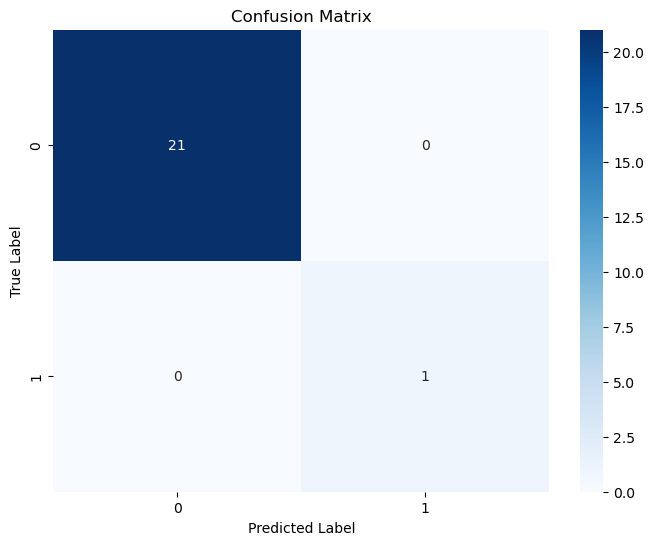

In [146]:
networks_data = {}
# ('subsim2', 18), ('subsim3', 16)
for name, batch_size in [('subsim3', 16)]:
        data_module, input_size = prepare_data_module(driver_df_3_train, 'NB_Claim', batch_size, oversample_minority=True)
        networks_data[name] = {
            'model': globals()[f'create_{name}'](input_size),
            'data_module': data_module
        }
#trainer = pl.Trainer(max_epochs=100)
for name, data in networks_data.items():
    print(f"Training {name}")
    model = train_model_with_early_stopping(
    model=data['model'],
    data_module=data['data_module'],
    max_epochs=100,
    early_stopping_patience=10,
    monitor='val_loss',
    mode='min'
    )
    evaluate_model(model, data_module, split='test')

Target variable statistics:
Mean: 3056.7193
Std: 5009.3585
Min: 0.0000
Max: 104074.8867
Training AMT


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/qinyanghe/opt/anaconda3/envs/MLenvironment/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name        | Type                                 | Params | Mode 
-----------------------------------------------------------------------------
0 | train_mse   | MeanSquaredError                     | 0      | train
1 | val_mse     | MeanSquaredError                     | 0      | train
2 | train_r2    | R2Score      


Epoch 0:
val_loss: 89.0334
val_mse: 16489327.0000
val_r2: 0.0089
val_smape: 89.2239


Metric val_loss improved by 0.346 >= min_delta = 0.0001. New best score: 88.688



Epoch 1:
val_loss: 88.6879
val_mse: 16025484.0000
val_r2: 0.0367
val_smape: 88.8277
train_loss: 103.6892
train_mse: 29905190.0000
train_r2: -0.0580
train_smape: 103.6892


Metric val_loss improved by 1.102 >= min_delta = 0.0001. New best score: 87.585



Epoch 2:
val_loss: 87.5855
val_mse: 16554779.0000
val_r2: 0.0049
val_smape: 87.7655
train_loss: 89.7800
train_mse: 27657068.0000
train_r2: 0.0216
train_smape: 89.7799


Metric val_loss improved by 0.332 >= min_delta = 0.0001. New best score: 87.253



Epoch 3:
val_loss: 87.2530
val_mse: 16253194.0000
val_r2: 0.0231
val_smape: 87.4342
train_loss: 88.5887
train_mse: 26938948.0000
train_r2: 0.0470
train_smape: 88.5888


Metric val_loss improved by 0.372 >= min_delta = 0.0001. New best score: 86.881



Epoch 4:
val_loss: 86.8811
val_mse: 16415973.0000
val_r2: 0.0133
val_smape: 87.0791
train_loss: 87.2241
train_mse: 26972582.0000
train_r2: 0.0458
train_smape: 87.2241


Metric val_loss improved by 0.188 >= min_delta = 0.0001. New best score: 86.693



Epoch 5:
val_loss: 86.6932
val_mse: 16049665.0000
val_r2: 0.0353
val_smape: 86.9072
train_loss: 86.7130
train_mse: 26728982.0000
train_r2: 0.0544
train_smape: 86.7131

Epoch 6:
val_loss: 89.9767
val_mse: 16122773.0000
val_r2: 0.0309
val_smape: 90.0952
train_loss: 85.3890
train_mse: 26670788.0000
train_r2: 0.0565
train_smape: 85.3890

Epoch 7:
val_loss: 87.2563
val_mse: 15432633.0000
val_r2: 0.0724
val_smape: 87.3928
train_loss: 84.5700
train_mse: 26330266.0000
train_r2: 0.0685
train_smape: 84.5701


Metric val_loss improved by 0.663 >= min_delta = 0.0001. New best score: 86.031



Epoch 8:
val_loss: 86.0305
val_mse: 15667432.0000
val_r2: 0.0583
val_smape: 86.1777
train_loss: 83.7804
train_mse: 26096052.0000
train_r2: 0.0768
train_smape: 83.7804


Metric val_loss improved by 0.598 >= min_delta = 0.0001. New best score: 85.433



Epoch 9:
val_loss: 85.4329
val_mse: 15529920.0000
val_r2: 0.0665
val_smape: 85.5969
train_loss: 82.4087
train_mse: 26057862.0000
train_r2: 0.0782
train_smape: 82.4087

Epoch 10:
val_loss: 87.6988
val_mse: 15389965.0000
val_r2: 0.0749
val_smape: 87.7559
train_loss: 81.8132
train_mse: 26342792.0000
train_r2: 0.0681
train_smape: 81.8132

Epoch 11:
val_loss: 85.9063
val_mse: 15551260.0000
val_r2: 0.0652
val_smape: 85.9700
train_loss: 80.7623
train_mse: 25826006.0000
train_r2: 0.0864
train_smape: 80.7624

Epoch 12:
val_loss: 86.7417
val_mse: 15621583.0000
val_r2: 0.0610
val_smape: 86.7813
train_loss: 79.8860
train_mse: 25804028.0000
train_r2: 0.0871
train_smape: 79.8860

Epoch 13:
val_loss: 86.5282
val_mse: 15969849.0000
val_r2: 0.0401
val_smape: 86.6270
train_loss: 79.5618
train_mse: 25860170.0000
train_r2: 0.0851
train_smape: 79.5618

Epoch 14:
val_loss: 85.5133
val_mse: 15824242.0000
val_r2: 0.0488
val_smape: 85.5018
train_loss: 78.8651
train_mse: 25321386.0000
train_r2: 0.1042
train_sm

Metric val_loss improved by 0.357 >= min_delta = 0.0001. New best score: 85.076



Epoch 15:
val_loss: 85.0760
val_mse: 15655880.0000
val_r2: 0.0590
val_smape: 85.0974
train_loss: 77.7143
train_mse: 25225566.0000
train_r2: 0.1076
train_smape: 77.7143


Metric val_loss improved by 0.833 >= min_delta = 0.0001. New best score: 84.243



Epoch 16:
val_loss: 84.2428
val_mse: 15675469.0000
val_r2: 0.0578
val_smape: 84.2287
train_loss: 77.4237
train_mse: 24997428.0000
train_r2: 0.1157
train_smape: 77.4236

Epoch 17:
val_loss: 85.4258
val_mse: 16353666.0000
val_r2: 0.0170
val_smape: 85.4124
train_loss: 76.7053
train_mse: 24996424.0000
train_r2: 0.1157
train_smape: 76.7053


Metric val_loss improved by 0.205 >= min_delta = 0.0001. New best score: 84.037



Epoch 18:
val_loss: 84.0374
val_mse: 15597833.0000
val_r2: 0.0624
val_smape: 84.0771
train_loss: 76.4769
train_mse: 24235436.0000
train_r2: 0.1426
train_smape: 76.4770


Metric val_loss improved by 0.420 >= min_delta = 0.0001. New best score: 83.618



Epoch 19:
val_loss: 83.6179
val_mse: 15968392.0000
val_r2: 0.0402
val_smape: 83.6150
train_loss: 75.5033
train_mse: 24517494.0000
train_r2: 0.1326
train_smape: 75.5033

Epoch 20:
val_loss: 84.8768
val_mse: 16279009.0000
val_r2: 0.0215
val_smape: 84.8717
train_loss: 74.7003
train_mse: 24138374.0000
train_r2: 0.1461
train_smape: 74.7003

Epoch 21:
val_loss: 83.6233
val_mse: 15468081.0000
val_r2: 0.0702
val_smape: 83.5993
train_loss: 74.4599
train_mse: 24671280.0000
train_r2: 0.1272
train_smape: 74.4599


Metric val_loss improved by 0.495 >= min_delta = 0.0001. New best score: 83.123



Epoch 22:
val_loss: 83.1231
val_mse: 15573246.0000
val_r2: 0.0639
val_smape: 83.1268
train_loss: 74.3296
train_mse: 24227692.0000
train_r2: 0.1429
train_smape: 74.3296

Epoch 23:
val_loss: 83.5827
val_mse: 15808058.0000
val_r2: 0.0498
val_smape: 83.6999
train_loss: 73.4146
train_mse: 24229110.0000
train_r2: 0.1428
train_smape: 73.4146


Metric val_loss improved by 0.089 >= min_delta = 0.0001. New best score: 83.034



Epoch 24:
val_loss: 83.0338
val_mse: 15508981.0000
val_r2: 0.0678
val_smape: 83.0678
train_loss: 72.8935
train_mse: 23990640.0000
train_r2: 0.1513
train_smape: 72.8934

Epoch 25:
val_loss: 83.6394
val_mse: 15653442.0000
val_r2: 0.0591
val_smape: 83.5840
train_loss: 72.5408
train_mse: 23498276.0000
train_r2: 0.1687
train_smape: 72.5407


Metric val_loss improved by 1.056 >= min_delta = 0.0001. New best score: 81.978



Epoch 26:
val_loss: 81.9776
val_mse: 14966531.0000
val_r2: 0.1004
val_smape: 82.0007
train_loss: 72.2569
train_mse: 23832986.0000
train_r2: 0.1569
train_smape: 72.2569

Epoch 27:
val_loss: 83.7498
val_mse: 15176992.0000
val_r2: 0.0877
val_smape: 83.8343
train_loss: 72.1624
train_mse: 23547376.0000
train_r2: 0.1670
train_smape: 72.1624


Metric val_loss improved by 0.097 >= min_delta = 0.0001. New best score: 81.881



Epoch 28:
val_loss: 81.8805
val_mse: 14973450.0000
val_r2: 0.1000
val_smape: 81.9493
train_loss: 71.2960
train_mse: 23808960.0000
train_r2: 0.1577
train_smape: 71.2959

Epoch 29:
val_loss: 83.5974
val_mse: 15725796.0000
val_r2: 0.0548
val_smape: 83.5679
train_loss: 70.8647
train_mse: 23105508.0000
train_r2: 0.1826
train_smape: 70.8647

Epoch 30:
val_loss: 82.0348
val_mse: 15131245.0000
val_r2: 0.0905
val_smape: 82.0088
train_loss: 69.5866
train_mse: 23371472.0000
train_r2: 0.1732
train_smape: 69.5867

Epoch 31:
val_loss: 82.2517
val_mse: 14976712.0000
val_r2: 0.0998
val_smape: 82.2285
train_loss: 70.2868
train_mse: 23093314.0000
train_r2: 0.1830
train_smape: 70.2868

Epoch 32:
val_loss: 82.2218
val_mse: 15163955.0000
val_r2: 0.0885
val_smape: 82.1686
train_loss: 69.2467
train_mse: 22627606.0000
train_r2: 0.1995
train_smape: 69.2467

Epoch 33:
val_loss: 82.6918
val_mse: 15337163.0000
val_r2: 0.0781
val_smape: 82.7279
train_loss: 69.1575
train_mse: 22618844.0000
train_r2: 0.1998
train_s

Metric val_loss improved by 0.769 >= min_delta = 0.0001. New best score: 81.111



Epoch 35:
val_loss: 81.1112
val_mse: 15180213.0000
val_r2: 0.0875
val_smape: 81.0996
train_loss: 68.1707
train_mse: 22646412.0000
train_r2: 0.1988
train_smape: 68.1707

Epoch 36:
val_loss: 81.2057
val_mse: 14894788.0000
val_r2: 0.1047
val_smape: 81.3113
train_loss: 67.5347
train_mse: 22294958.0000
train_r2: 0.2113
train_smape: 67.5347


Metric val_loss improved by 0.730 >= min_delta = 0.0001. New best score: 80.381



Epoch 37:
val_loss: 80.3812
val_mse: 14449016.0000
val_r2: 0.1315
val_smape: 80.4772
train_loss: 67.4156
train_mse: 22494718.0000
train_r2: 0.2042
train_smape: 67.4156

Epoch 38:
val_loss: 81.7838
val_mse: 14637635.0000
val_r2: 0.1202
val_smape: 81.9721
train_loss: 66.9640
train_mse: 21607416.0000
train_r2: 0.2356
train_smape: 66.9640

Epoch 39:
val_loss: 80.8899
val_mse: 14435106.0000
val_r2: 0.1323
val_smape: 81.0744
train_loss: 67.4114
train_mse: 21541484.0000
train_r2: 0.2379
train_smape: 67.4115

Epoch 40:
val_loss: 81.2203
val_mse: 15063285.0000
val_r2: 0.0946
val_smape: 81.2511
train_loss: 66.3238
train_mse: 21482916.0000
train_r2: 0.2400
train_smape: 66.3239

Epoch 41:
val_loss: 80.7454
val_mse: 14178862.0000
val_r2: 0.1477
val_smape: 80.8504
train_loss: 65.9190
train_mse: 21959054.0000
train_r2: 0.2232
train_smape: 65.9190


Metric val_loss improved by 0.340 >= min_delta = 0.0001. New best score: 80.041



Epoch 42:
val_loss: 80.0414
val_mse: 14404081.0000
val_r2: 0.1342
val_smape: 80.2058
train_loss: 64.9572
train_mse: 21304128.0000
train_r2: 0.2463
train_smape: 64.9572

Epoch 43:
val_loss: 80.3163
val_mse: 14784548.0000
val_r2: 0.1113
val_smape: 80.4345
train_loss: 65.0470
train_mse: 21677978.0000
train_r2: 0.2331
train_smape: 65.0471

Epoch 44:
val_loss: 80.2402
val_mse: 14332932.0000
val_r2: 0.1385
val_smape: 80.3926
train_loss: 64.5823
train_mse: 21309516.0000
train_r2: 0.2461
train_smape: 64.5823


Metric val_loss improved by 0.371 >= min_delta = 0.0001. New best score: 79.671



Epoch 45:
val_loss: 79.6705
val_mse: 14412187.0000
val_r2: 0.1337
val_smape: 79.8063
train_loss: 65.3405
train_mse: 21484216.0000
train_r2: 0.2400
train_smape: 65.3405


Metric val_loss improved by 0.532 >= min_delta = 0.0001. New best score: 79.138



Epoch 46:
val_loss: 79.1382
val_mse: 14187714.0000
val_r2: 0.1472
val_smape: 79.3205
train_loss: 64.1406
train_mse: 21733734.0000
train_r2: 0.2311
train_smape: 64.1406


Metric val_loss improved by 0.864 >= min_delta = 0.0001. New best score: 78.274



Epoch 47:
val_loss: 78.2743
val_mse: 14329852.0000
val_r2: 0.1387
val_smape: 78.4483
train_loss: 64.4647
train_mse: 20827274.0000
train_r2: 0.2632
train_smape: 64.4647

Epoch 48:
val_loss: 78.6974
val_mse: 14308759.0000
val_r2: 0.1399
val_smape: 78.8667
train_loss: 63.5705
train_mse: 20790330.0000
train_r2: 0.2645
train_smape: 63.5705

Epoch 49:
val_loss: 79.7963
val_mse: 14610399.0000
val_r2: 0.1218
val_smape: 79.9226
train_loss: 62.5653
train_mse: 21012572.0000
train_r2: 0.2566
train_smape: 62.5654

Epoch 50:
val_loss: 80.0541
val_mse: 15032014.0000
val_r2: 0.0965
val_smape: 80.2346
train_loss: 63.3547
train_mse: 20723204.0000
train_r2: 0.2669
train_smape: 63.3546

Epoch 51:
val_loss: 78.7957
val_mse: 14057861.0000
val_r2: 0.1550
val_smape: 78.9604
train_loss: 63.2302
train_mse: 20584652.0000
train_r2: 0.2718
train_smape: 63.2302

Epoch 52:
val_loss: 78.9479
val_mse: 14199594.0000
val_r2: 0.1465
val_smape: 79.0783
train_loss: 62.5412
train_mse: 20093656.0000
train_r2: 0.2891
train_s

Monitored metric val_loss did not improve in the last 10 records. Best score: 78.274. Signaling Trainer to stop.



Epoch 57:
val_loss: 78.8655
val_mse: 14206130.0000
val_r2: 0.1461
val_smape: 79.0011
train_loss: 60.5978
train_mse: 19929380.0000
train_r2: 0.2950
train_smape: 60.5979

Regression Metrics (test set):
MSE: 14302457.0000
RMSE: 3781.8589
MAE: 1927.5707
R²: 0.1754


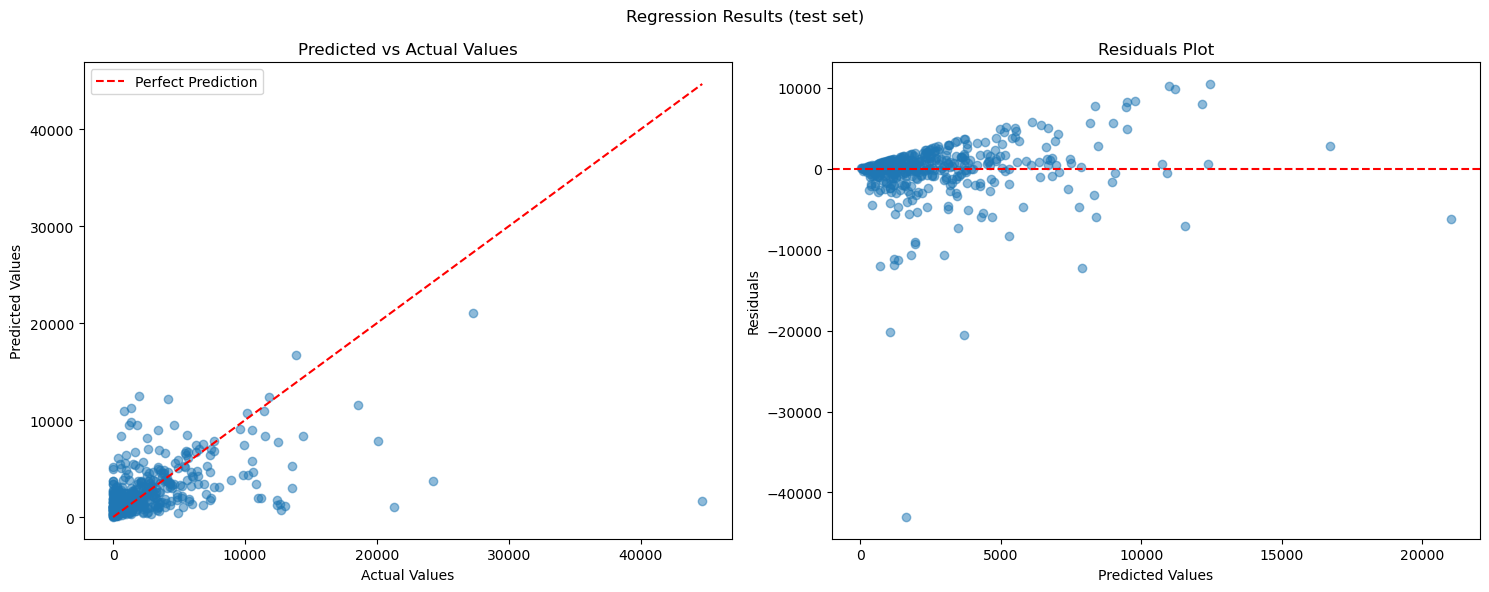

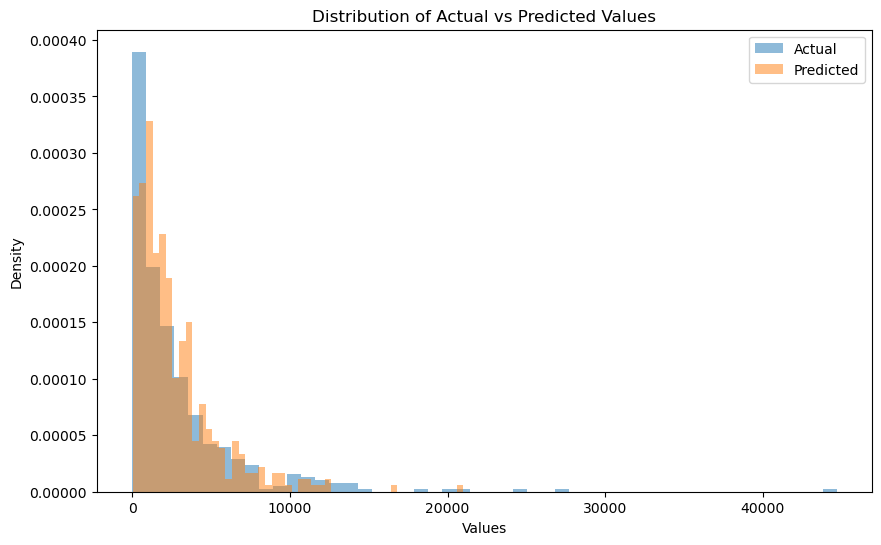

In [12]:
networks_data = {}
data_module, input_size, target_scaler = dr.prepare_regression_data_module(driver_df_amt, 'AMT_Claim', 3)
networks_data["AMT"] = {
    'model': dr.RegressionNetwork(input_size),
    'data_module': data_module
}
#trainer = pl.Trainer(max_epochs=100)
for name, data in networks_data.items():
    print(f"Training {name}")
    model = dr.train_model_with_early_stopping(
    model=data['model'],
    data_module=data['data_module'],
    max_epochs=100,
    early_stopping_patience=10,
    monitor='val_loss',
    mode='min'
    )
    dr.evaluate_regression_model(model, data_module, split='test')

In [11]:
import importlib
importlib.reload(dr)

<module 'DriverRisk' from '/Users/qinyanghe/Library/Mobile Documents/com~apple~CloudDocs/Documents/driver behavior modeling/DriverRisk.py'>

In [43]:
dr_test()

'fsfass'

In [138]:
driver_df_3 = driver_df.copy()
driver_df_3 = driver_df_3[driver_df_3['NB_Claim'] >= 2]

In [144]:
sum(driver_df_3['NB_Claim'] == 3)

0

In [148]:
arrays = [[1,2,3],[4,5],[1,2,3]]
arrays[1:]

[[4, 5], [1, 2, 3]]

In [1]:
driver_df_amt

NameError: name 'driver_df_amt' is not defined